<a href="https://colab.research.google.com/github/martinpius/TensorFlow_Graph_Functions/blob/main/Training_and_Evaluation_with_inbuild_fns_of_keras_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using Google Colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n...Load Your Drive...")

def mytime(t):
  '''take time in second and format in a nice readable form'''
  h = int(t / (60 * 60))
  m = int(t % (60 * 60)/60)
  s = int(t % 60)
  return (f"{h}:{m:>02}:{s:>05.2f}")
mytime(1100.128784)



Mounted at /content/drive
You are using Google Colab with tensorflow version: 2.4.0


'0:18:20.00'

In [1]:
import tensorflow as tf

In [3]:
#cnn with residual blocks for mnist dataset

Model: "mnist_simple_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mnst (InputLayer)               [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 128)  1280        mnst[0][0]                       
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 24, 64)   73792       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 12, 12, 64)   0           conv2d_1[0][0]                   
________________________________________________________________________________

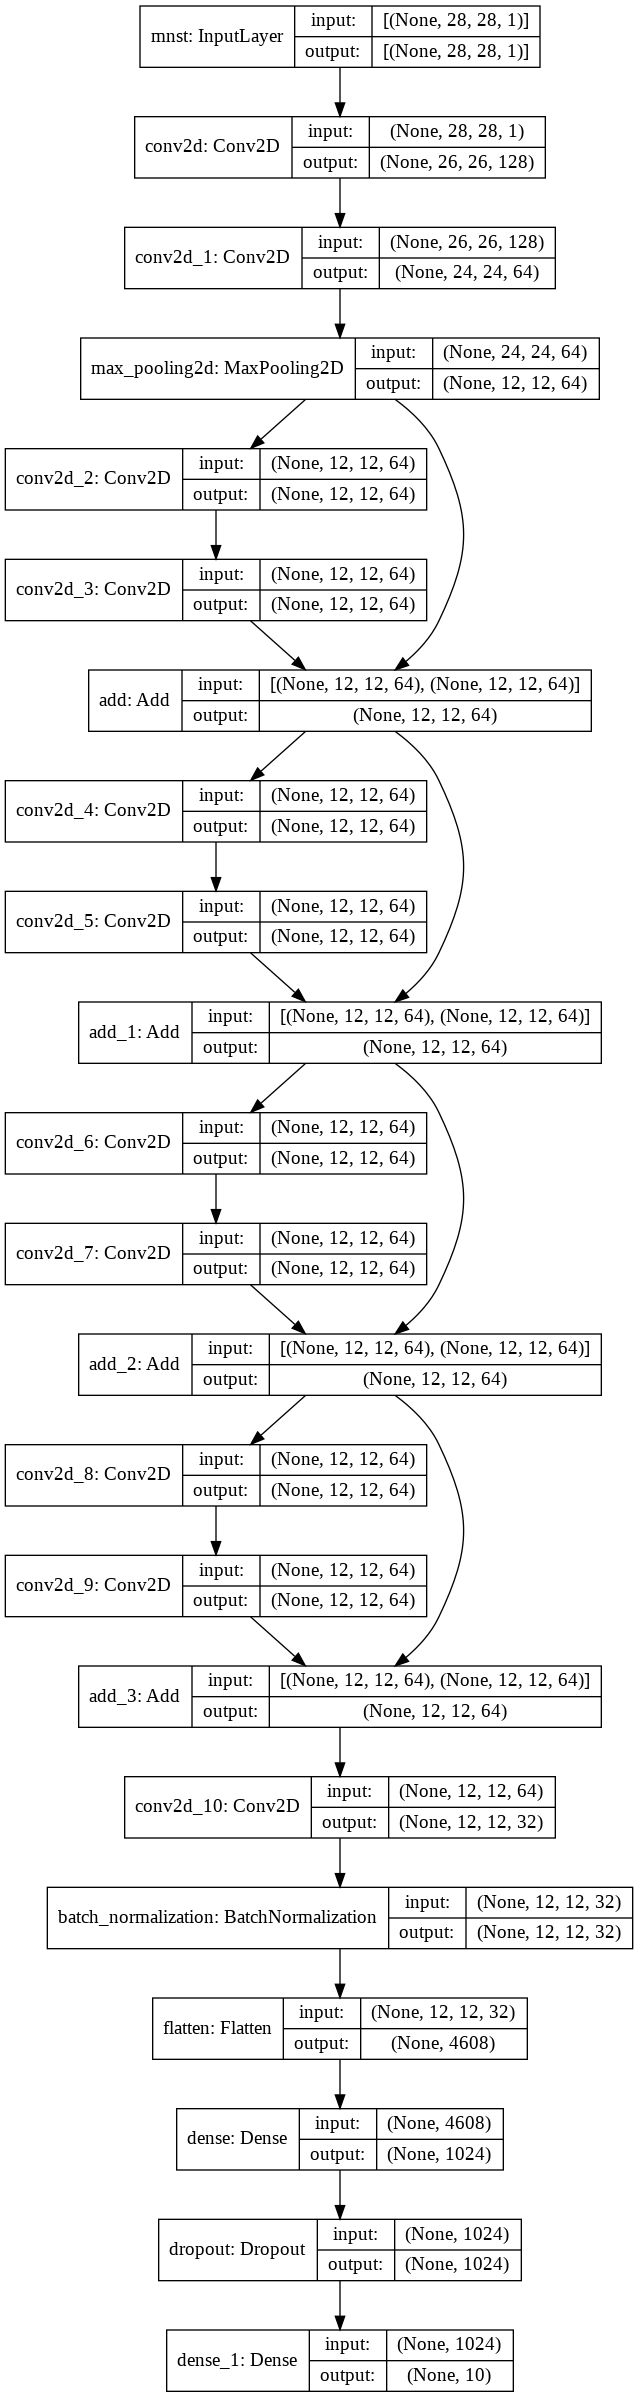

In [4]:
inputs = tf.keras.Input(shape = (28, 28,1), name = 'mnst')
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu')(inputs)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid', activation = 'relu')(x)
out = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(out)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
res_block_1 = tf.keras.layers.add([x, out])

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(res_block_1)
x = tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
res_block_2 = tf.keras.layers.add([x, res_block_1])

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(res_block_2)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
res_block_3 = tf.keras.layers.add([x, res_block_2])

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(res_block_3)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
out = tf.keras.layers.add([x, res_block_3])

x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(out)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(rate = 0.5)(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'mnist_simple_resnet')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'mnist_simple_resnet.png', show_shapes = True)


In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])


In [6]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train, x_test = (x_train/255.0).astype('float32'), (x_test/255.0).astype('float32')

In [8]:
y_train, y_test = tf.keras.utils.to_categorical(y_train, num_classes = 10), tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [9]:
print(f"x_train_shape: {x_train.shape},y_train_shape = {y_train.shape}\nx_test_shape: {x_test.shape},y_test_shape: {y_test.shape}")

x_train_shape: (60000, 28, 28),y_train_shape = (60000, 10)
x_test_shape: (10000, 28, 28),y_test_shape: (10000, 10)


In [10]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 2, epochs = 100, batch_size = 64)

Epoch 1/100
938/938 - 21s - loss: 0.1861 - accuracy: 0.9545 - val_loss: 0.0621 - val_accuracy: 0.9810
Epoch 2/100
938/938 - 13s - loss: 0.0672 - accuracy: 0.9831 - val_loss: 0.0488 - val_accuracy: 0.9895
Epoch 3/100
938/938 - 13s - loss: 0.0544 - accuracy: 0.9868 - val_loss: 0.1238 - val_accuracy: 0.9813
Epoch 4/100
938/938 - 13s - loss: 0.0461 - accuracy: 0.9888 - val_loss: 0.0496 - val_accuracy: 0.9896
Epoch 5/100
938/938 - 13s - loss: 0.0442 - accuracy: 0.9892 - val_loss: 0.0425 - val_accuracy: 0.9914
Epoch 6/100
938/938 - 13s - loss: 0.0426 - accuracy: 0.9905 - val_loss: 0.0502 - val_accuracy: 0.9890
Epoch 7/100
938/938 - 13s - loss: 0.0380 - accuracy: 0.9908 - val_loss: 0.0776 - val_accuracy: 0.9835
Epoch 8/100
938/938 - 13s - loss: 0.0368 - accuracy: 0.9912 - val_loss: 0.0329 - val_accuracy: 0.9922
Epoch 9/100
938/938 - 13s - loss: 0.0330 - accuracy: 0.9919 - val_loss: 0.0650 - val_accuracy: 0.9881
Epoch 10/100
938/938 - 13s - loss: 0.0392 - accuracy: 0.9915 - val_loss: 0.0423 - 

In [48]:
def create_model():
  inputs = tf.keras.Input(shape = (784,), name = 'input_dim')
  x = tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_initializer = 'random_normal')(inputs)
  x = tf.keras.layers.Dense(units = 64, kernel_initializer = 'random_normal', activation = 'relu')(x)
  x = tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_initializer = 'random_normal')(x)
  x = tf.keras.layers.Dropout(rate = 0.5)(x)
  outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)
  model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'mnist_mlp')
  return model

def model_compile():
  model = create_model()
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = tf.keras.metrics.CategoricalAccuracy(),
                optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3))
  return model


Model: "mnist_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_dim (InputLayer)       [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
___________________________________________________

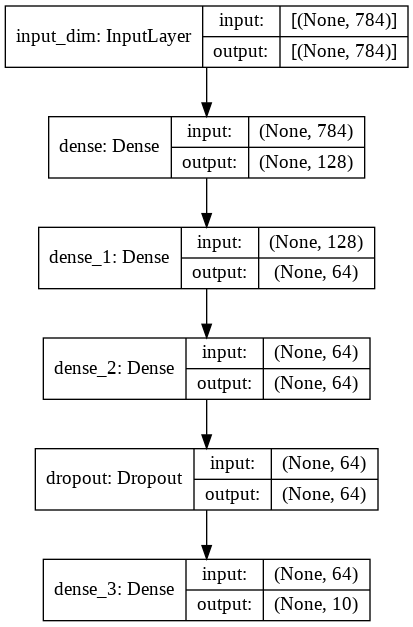

In [5]:
mlp = create_model()
mlp.summary()
tf.keras.utils.plot_model(model = mlp, to_file = 'mlp_mnist.png', show_shapes = True)

In [32]:
#We can now train our model multiple time by calling the above function whenever we need

In [33]:
def myloss(y_real, y_pred):
  return tf.reduce_mean(tf.square(y_real - y_pred))

In [34]:
myloss(2.001,1.980)

<tf.Tensor: shape=(), dtype=float32, numpy=0.00044099998>

In [47]:
#Train on modified mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [48]:
x_train, x_test = x_train.reshape(60000, 784), x_test.reshape(10000, 784)

In [49]:
x_train, x_test = (x_train/255.0).astype('float32'), (x_test/255.0).astype('float32')
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [50]:
y_train1, y_test1 = tf.one_hot(y_train, depth = 10), tf.one_hot(y_test, depth = 10)
y_train1.shape, y_test1.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [39]:
#Train the model with predefined loss function

mlp = create_model()
mlp.compile(loss = myloss, optimizer = 'Adam',metrics = ['mse'])

In [40]:
mlp.fit(x_train, y_train1, validation_data = (x_test, y_test1), epochs = 10, verbose = 2, batch_size = 64)

Epoch 1/10
938/938 - 4s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 2/10
938/938 - 2s - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 3/10
938/938 - 2s - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4/10
938/938 - 2s - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 5/10
938/938 - 2s - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6/10
938/938 - 2s - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7/10
938/938 - 2s - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 8/10
938/938 - 2s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9/10
938/938 - 2s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 10/10
938/938 - 2s - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0046 - val_mse: 0.0046


In [41]:
#A loss function with a penalty factor to reduce overfitting.
#Assume the simple loss function of mse (categorical labels must be converted to one_hot vector)

In [10]:
class NewLoss(tf.keras.losses.Loss):
  def __init__(self, penalty_factor = 0.1, name = 'Customized_Loss'):
    super(NewLoss, self).__init__(name = name)
    self.penalty_factor = penalty_factor
  
  def call(self, y_real, y_pred):
    mse = tf.math.reduce_mean(tf.square(y_real - y_pred))
    p_calc = tf.math.reduce_mean(tf.square(0.5 - y_pred))
    return mse + p_calc * self.penalty_factor

In [44]:
#Train the model using the new customized loss which penalizes the predictions to reduce overfitting

In [52]:
mlp = create_model()
mlp.compile(loss = NewLoss(), optimizer = 'Adam', metrics = ['mse'])

In [53]:
mlp.fit(x_train, y_train1, validation_data = (x_test, y_test1), epochs = 20, verbose = 2, batch_size = 64)

Epoch 1/20
938/938 - 2s - loss: 0.0418 - mse: 0.0195 - val_loss: 0.0316 - val_mse: 0.0076
Epoch 2/20
938/938 - 2s - loss: 0.0317 - mse: 0.0079 - val_loss: 0.0301 - val_mse: 0.0057
Epoch 3/20
938/938 - 2s - loss: 0.0301 - mse: 0.0060 - val_loss: 0.0297 - val_mse: 0.0052
Epoch 4/20
938/938 - 2s - loss: 0.0290 - mse: 0.0047 - val_loss: 0.0291 - val_mse: 0.0045
Epoch 5/20
938/938 - 2s - loss: 0.0283 - mse: 0.0039 - val_loss: 0.0287 - val_mse: 0.0041
Epoch 6/20
938/938 - 2s - loss: 0.0280 - mse: 0.0035 - val_loss: 0.0285 - val_mse: 0.0039
Epoch 7/20
938/938 - 2s - loss: 0.0277 - mse: 0.0032 - val_loss: 0.0290 - val_mse: 0.0043
Epoch 8/20
938/938 - 2s - loss: 0.0274 - mse: 0.0028 - val_loss: 0.0284 - val_mse: 0.0036
Epoch 9/20
938/938 - 2s - loss: 0.0272 - mse: 0.0026 - val_loss: 0.0284 - val_mse: 0.0037
Epoch 10/20
938/938 - 2s - loss: 0.0269 - mse: 0.0022 - val_loss: 0.0285 - val_mse: 0.0038
Epoch 11/20
938/938 - 2s - loss: 0.0267 - mse: 0.0020 - val_loss: 0.0284 - val_mse: 0.0036
Epoch 12

In [2]:
#Losses and metrics that are not pre-included in tf-keras
#Some losses do not require the outputs/labels. They can be added as a layer to a network
#Regularizers such as l1, l2 can be added by including activity regularization (in-built for keras layers)

In [3]:
#Simple demo
import tensorflow as tf
class MyRegularizer(tf.keras.layers.Layer):
  def call(self, inputs):
    self.add_loss(tf.reduce_sum(inputs)*0.1)
    return inputs

In [24]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [25]:
x_train, x_test = (x_train.reshape(60000,784)/255.0).astype('float32'), (x_test.reshape(10000,784)/255.0).astype('float32')

In [26]:
y_train1, y_test1 = tf.one_hot(y_train, depth = 10), tf.one_hot(y_test, depth = 10)

Model: "mnist_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mnist_mlp (InputLayer)       [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
my_regularizer (MyRegularize (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
___________________________________________________

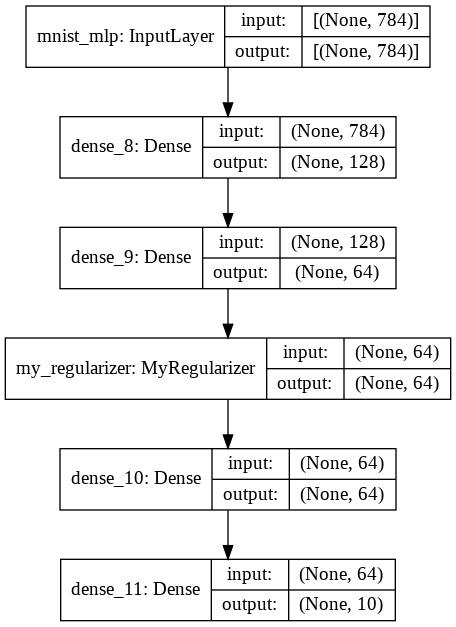

In [11]:
inputs = tf.keras.Input(shape = (784,), name = 'mnist_mlp')
x = tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_initializer = 'random_normal')(inputs)
x = tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_initializer = 'random_normal')(x)
x = MyRegularizer()(x)#Inserting our custom regularizer layer (act as a loss fn)
x = tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_initializer = 'random_normal')(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)
mlp = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'mnist_mlp')
mlp.summary()
tf.keras.utils.plot_model(model = mlp, to_file = 'mnist.mlp_new.png', show_shapes = True)


In [12]:
mlp.compile(loss = NewLoss(), optimizer = 'rmsprop', metrics = ['mse'])

In [14]:
mlp.fit(x_train, y_train1, validation_data = (x_test, y_test1), epochs = 1, verbose = 2, batch_size= 64)

938/938 - 3s - loss: 0.1060 - mse: 0.0900 - val_loss: 0.1060 - val_mse: 0.0900


In [16]:
#Calling model.add_loss/metrics in keras model using fn API

In [27]:
from tensorflow import keras
inputs = tf.keras.Input(shape = (784,), name = 'inputs_dim')
layer1 = tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_initializer = 'random_normal')(inputs)
layer2 = tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_initializer = 'random_normal')(layer1)
layer3 = tf.keras.layers.Dropout(rate = 0.5)(layer2)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(layer3)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.add_loss(tf.reduce_sum(layer1)*0.25)
model.add_metric(keras.backend.std(layer1), name="std_of_activation", aggregation="mean")


In [28]:
model.compile(loss = NewLoss(), optimizer = 'rmsprop', metrics = ['mse'])

In [33]:
model.fit(x_train, y_train1, validation_data = (x_test, y_test1), verbose = 2, epochs = 3, batch_size = 64)

Epoch 1/3
938/938 - 2s - loss: 0.1060 - mse: 0.0900 - std_of_activation: 0.0000e+00 - val_loss: 0.1081 - val_mse: 0.0900 - val_std_of_activation: 8.7804e-05
Epoch 2/3
938/938 - 2s - loss: 0.1060 - mse: 0.0900 - std_of_activation: 0.0000e+00 - val_loss: 0.1081 - val_mse: 0.0900 - val_std_of_activation: 8.7804e-05
Epoch 3/3
938/938 - 2s - loss: 0.1060 - mse: 0.0900 - std_of_activation: 0.0000e+00 - val_loss: 0.1081 - val_mse: 0.0900 - val_std_of_activation: 8.7804e-05


In [26]:
import tensorflow as tf

In [27]:
#including loss and metric layers through add_loss and add_metric
#An example of a binary logistic model

In [28]:
class BinaryLogistic(tf.keras.layers.Layer):
  def __init__(self, name = None):
    super(BinaryLogistic, self).__init__(name = name)
    self.loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits = True)
    self.metric_fn = tf.keras.metrics.BinaryAccuracy()
  
  def call(self, y_real, y_pred, initial_weights = None):
    loss = self.loss_fn(y_real, y_pred, initial_weights)
    self.add_loss(loss)
    acc = self.metric_fn(y_real, y_pred, initial_weights)
    self.add_metric(acc, name = 'my_accuracy')
    return tf.nn.softmax(y_pred)

In [29]:
#Testing the above class on toy data

In [30]:
inputs = tf.keras.Input(shape = (10,), name = 'input_shape')
labels = tf.keras.Input(shape = (5,), name = 'y_real')
logits = tf.keras.layers.Dense(units = 5, activation = 'softmax')(inputs)
my_preds = BinaryLogistic(name = 'my_preds')(labels, logits)

In [31]:
model = tf.keras.Model(inputs = [inputs, labels], outputs = my_preds, name = 'sample_bin')

In [32]:
model.compile(optimizer = 'Adam')

In [33]:
import numpy as np

In [34]:
toy_data = {'input_shape':np.random.random((5,10)),
            'y_real':np.random.random((5,5))}

In [35]:
model.fit(toy_data, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 280ms/step - loss: 0.7347 - binary_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 0.7338 - binary_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 0.7328 - binary_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 0.7319 - binary_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 0.7310 - binary_accuracy: 0.0000e+00


In [36]:
#If we have large dataset sometimes we need to stream the data or change it in a light form using tf

In [49]:
#Example with the mnist data
model = model_compile()

In [50]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [51]:
#Convert to tensorflow data
(x_train, x_test) = x_train.reshape(60000, 784), x_test.reshape(10000, 784)
(y_train, y_test) = tf.one_hot(y_train, depth = 10), tf.one_hot(y_test, depth = 10)

In [52]:
dfm_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dfm_train = dfm_train.shuffle(buffer_size = 1024).batch(64)
dfm_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
dfm_test = dfm_test.batch(64)

In [53]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1933 - categorical_accuracy: 0.7166 - val_loss: 0.4639 - val_categorical_accuracy: 0.8923
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5765 - categorical_accuracy: 0.8804 - val_loss: 0.5451 - val_categorical_accuracy: 0.9320
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6225 - categorical_accuracy: 0.8779 - val_loss: 0.4498 - val_categorical_accuracy: 0.9290
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7072 - categorical_accuracy: 0.8707 - val_loss: 0.4673 - val_categorical_accuracy: 0.9176
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7936 - categorical_accuracy: 0.8637 - val_loss: 1.0255 - val_categorical_accuracy: 0.9248
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9016 - categorical_accuracy: 0.8521 - val_loss: 0.6471 - val_categorical_accuracy:

In [1]:
#Multi_inputs_outputs model

In [2]:
#Consider the following model which takes inputs from different sources (images) and other physical properties


In [11]:
inputs1 = tf.keras.Input(shape = (28,28,3), name = 'GeneExpression')
inputs2 = tf.keras.Input(shape = (None, 10), name = 'SurvivalTimes')

x1 = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(inputs1)
x1 = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'valid')(x1)
x1 = tf.keras.layers.GlobalMaxPooling2D()(x1)

x2 = tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same')(inputs2)
x2 = tf.keras.layers.GlobalMaxPooling1D()(x2)

x = tf.keras.layers.concatenate([x1, x2])

class1 = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)
class2 = tf.keras.layers.Dense(units = 1)(x)

model = tf.keras.Model(inputs = [inputs1, inputs2], outputs = [class1, class2], name = 'ComplexModel')

Model: "ComplexModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
GeneExpression (InputLayer)     [(None, 28, 28, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 28, 28, 128)  3584        GeneExpression[0][0]             
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 64)   73792       conv2d_15[0][0]                  
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 28, 28, 64)   256         conv2d_16[0][0]                  
_______________________________________________________________________________________

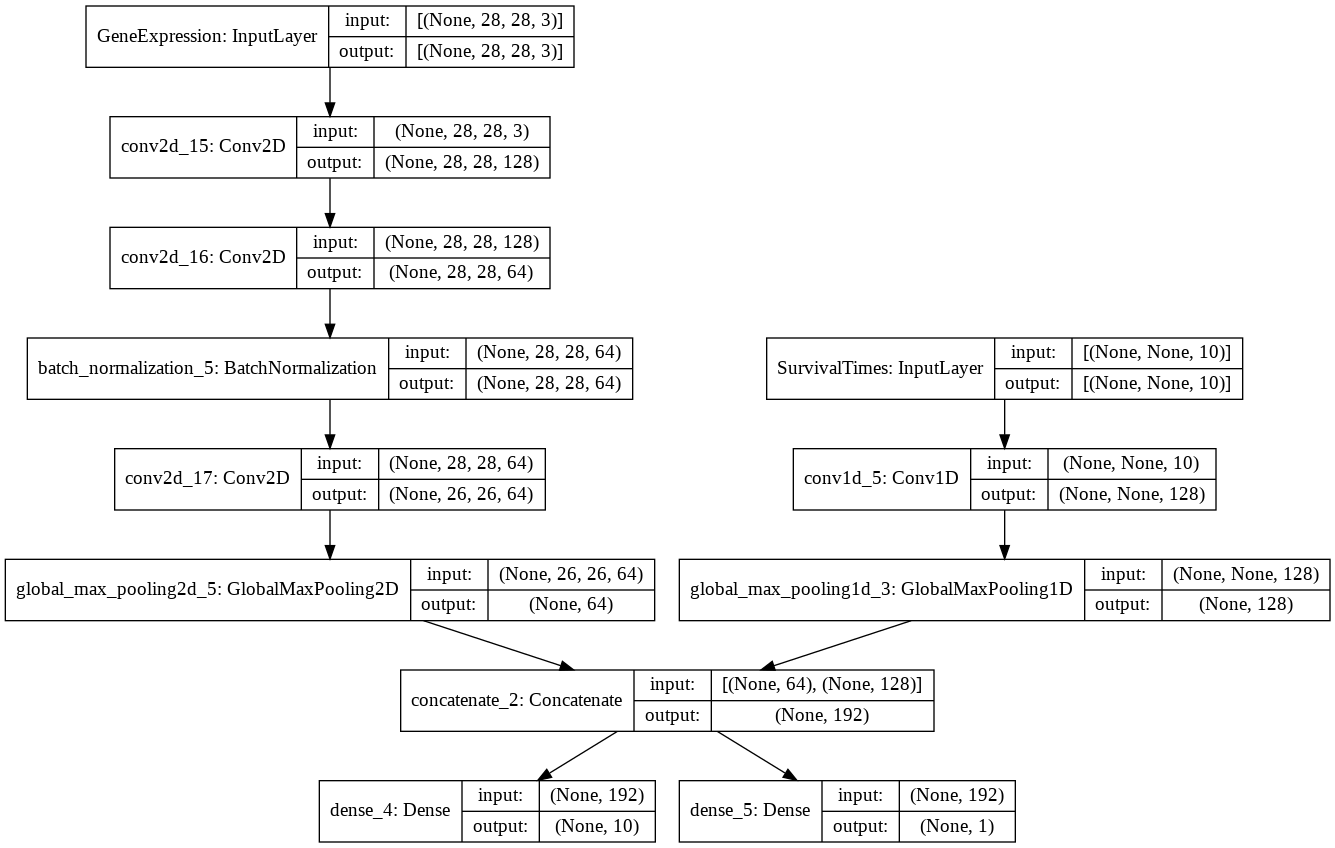

In [12]:
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'ComplexModel.png', show_shapes = True)

In [16]:
#Compiling the model with separates losses if possible
#different metrics and optimizers

In [24]:
model.compile(optimizer = 'RMSprop',
              loss = {
                  'dense_4':'categorical_crossentropy',
                  'dense_5':'MeanSquaredError'
              },
              metrics = {
                  'dense_4':['accuracy'],
                  'dense_5': ['mse']
              })

In [25]:
#using numpy to get a Toy data

In [26]:
import numpy as np

In [27]:
inputs1 = np.random.random_sample(size = (50, 28, 28, 3)) #Gene Expression images
inputs2 = np.random.random_sample(size = (50, 10, 10))# Survival data(time)
out1 = np.random.random_sample(size = (50, 10))# outputs for the class
out2 = np.random.random_sample(size = (50,1))# regression outputs

In [28]:
#train the model using the above toy data (put in a list and train as ussual)

In [29]:
model.fit([inputs1, inputs2], [out1, out2], batch_size = 16, epochs = 2, verbose = 2)

Epoch 1/2
4/4 - 8s - loss: 16.3965 - dense_4_loss: 14.8006 - dense_5_loss: 1.5958 - dense_4_accuracy: 0.1000 - dense_5_mse: 1.5958
Epoch 2/2
4/4 - 0s - loss: 14.2552 - dense_4_loss: 14.1276 - dense_5_loss: 0.1276 - dense_4_accuracy: 0.1200 - dense_5_mse: 0.1276
